In [1]:
!nvidia-smi

Thu Apr 28 07:02:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import relevant libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")
import cv2 
import numpy as np
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

## Function-1

In [4]:
def final_fun_1(image):
    """
    This function includes the entire pipeline, from data preprocessing to making final predictions.
    Input : Image
    Output: Predictions for the input
    """ 
    model = load_model("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/model5_with_augmentation_save/weights-07-0.9517.hdf5")
    image = cv2.resize(image, (224,224), 3)
    image = image / 255
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)
    
    class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
    predicted_index = np.argmax(pred,axis=1)
    predicted_class_label = class_labels[predicted_index[0]]
    K.clear_session()
    return predicted_class_label

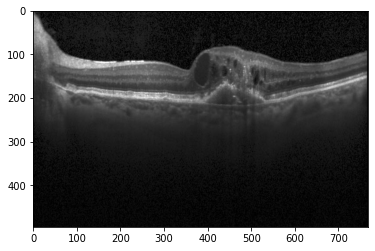

Actual Class Label   : CNV
Predicted Class Label: CNV



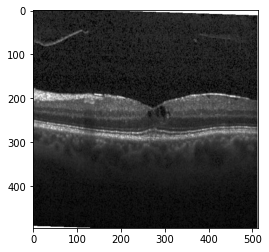

Actual Class Label   : DME
Predicted Class Label: DME



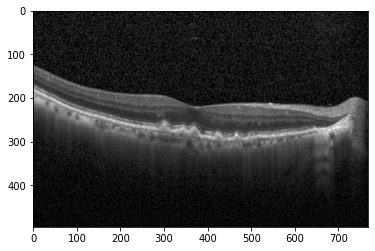

Actual Class Label   : DRUSEN
Predicted Class Label: DRUSEN



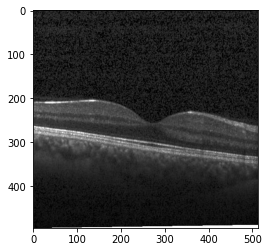

Actual Class Label   : NORMAL
Predicted Class Label: NORMAL


In [5]:
# For a single image (CNV)
image = cv2.imread("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/sample_images/CNV-53018-1.jpeg")
pred = final_fun_1(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : CNV")
print("Predicted Class Label:", pred)

print()

# For a single image (DME)
image = cv2.imread("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/sample_images/DME-11053-1.jpeg")
pred = final_fun_1(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : DME")
print("Predicted Class Label:", pred)

print()

# For a single image (DRUSEN)
image = cv2.imread("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/sample_images/DRUSEN-95633-1.jpeg")
pred = final_fun_1(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : DRUSEN")
print("Predicted Class Label:", pred)


print()

# For a single image (NORMAL)
image = cv2.imread("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/sample_images/NORMAL-9251-1.jpeg")
pred = final_fun_1(image)
plt.imshow(image)
plt.show()
print("Actual Class Label   : NORMAL")
print("Predicted Class Label:", pred)

## Function-2

In [6]:
!unzip /content/drive/Shareddrives/HH\ Paid\ SD\ \(11147\)/Sanayya/Applied\ AI\ Course/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [7]:
import shutil
shutil.rmtree("/content/oct2017")

In [8]:
def final_fun_2(path):
    """
    This function includes entire pipeline, from data preprocessing to making final predictions.
    Input : test dataset folder
    Output: metric value that we are judging our model on
    """
    # Accuracy on test dataset
    model = load_model("/content/drive/Shareddrives/HH Paid SD (11147)/Sanayya/Applied AI Course/Applied AI Assignments (DL)/32 Case Study 2/model5_with_augmentation_save/weights-07-0.9517.hdf5")

    datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_generator = datagen.flow_from_directory(
      path,
      target_size = (224, 224),
      batch_size=128,
      class_mode = "categorical",
      shuffle = False)
    test_samples = 968
    batch_size = 128

    result = model.evaluate(test_generator, steps = test_samples // batch_size+1, verbose = 1)

    # predicted values
    y_pred = model.predict(test_generator, test_samples // batch_size+1)
    predicted_values = np.argmax(y_pred, axis=1)

    confusionmatrix = confusion_matrix(test_generator.classes,predicted_values)
    plt.title("Plot Confusion Matrix")
    sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt='g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    return result

Found 968 images belonging to 4 classes.
8/8 [==============================] - 14s 2s/step - loss: 0.0707 - accuracy: 0.9804


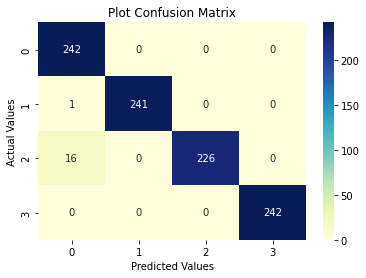

Accuracy on Test Dataset using the best model:98.037189245224


In [10]:
result = final_fun_2("/content/OCT2017 /test")
print("Accuracy on Test Dataset using the best model:{}".format(result[1]*100))

**Observations:**
1. Our notebook consists of two functions final_fun_1 and final_fun_2.
2. Our Function-1 i.e., final_fun_1 includes entire pipeline, from data preprocessing to making final predictions. It is taking an image as an input and returning predictions for our input.
3. Our Function-2 i.e., final_fun_2 also includes entire pipeline, from data preprocessing to making final predictions. It is taking test dataset as an input and returning the metric value that we are judging our model on.
4. We are getting a good Accuracy Score of 0.98 on the final dataset.